# Assemble Results of Speed Benchmarks

In [1]:
import os

import pandas as pd

dirname_qe = "./"
dirnames_qtm = ["./"]

qe_files = []
l_qtm_files = []

l_dict_qe = []
l_dict_qtm = []

# Create a Pandas DataFrame to store the data
columns = [
    "numprocs",
    "numcalls_scf",
    "total_time_scf",
    "numcalls_hpsi",
    "total_time_hpsi",
]


for filename in os.listdir(dirname_qe):
    if "qe" in filename:
        qe_files.append(filename)

for i, dirname in enumerate(dirnames_qtm):
    l_qtm_files.append([])
    for filename in os.listdir(dirname):
        if "qtm" in filename:
            l_qtm_files[i].append(filename)

print(qe_files)
print(l_qtm_files)

# Process qe_files separately
for filename in qe_files:
    # Extract information from lines of the form:
    # electrons    :    290.33s CPU    294.56s WALL (       1 calls)
    # h_psi        :    183.07s CPU    184.02s WALL (      85 calls)

    with open(dirname_qe + filename, "r") as f:
        lines = f.readlines()
        for line in lines:

            if line.strip().startswith("electrons    "):
                # Extract the numcalls and total_time
                numcalls_scf = int(line.split()[7])
                total_time_scf = float(line.split()[4][:-1])

            elif line.strip().startswith("h_psi        :"):
                numcalls_hpsi = int(line.split()[7])
                total_time_hpsi = float(line.split()[4][:-1])
        l_dict_qe.append(
            {
                "numprocs": int(filename.split("_")[4].split(".")[0]),
                "numcalls_scf": numcalls_scf,
                "total_time_scf": total_time_scf,
                "numcalls_hpsi": numcalls_hpsi,
                "total_time_hpsi": total_time_hpsi,
            }
        )

df_qe = pd.DataFrame(data=l_dict_qe, columns=columns)
display(df_qe)

# Process qtm_files separately
l_df_qtm = []
for filenames, dirname in zip(l_qtm_files, dirnames_qtm):
    print(i, filenames, dirname)
    l_dict_qtm.append([])
    for filename in filenames:
        # Extract information from lines of the form:
        # |           scf:scf            |       1|  695.25| STOPPED |
        # |         KSHam:h_psi          |     248|  405.93| STOPPED |
        with open(dirname + filename, "r") as f:
            lines = f.readlines()
            for line in lines:
                if line.strip().startswith("|           scf:scf            "):
                    numcalls_scf = int(line.split("|")[2].strip())
                    total_time_scf = float(line.split("|")[3].strip())
                elif line.strip().startswith("|         KSHam:h_psi          "):
                    numcalls_hpsi = int(line.split("|")[2].strip())
                    total_time_hpsi = float(line.split("|")[3].strip())
            
            l_dict_qtm[-1].append(
                {
                    "numprocs": int(filename.split("_")[3].split(".")[0]),
                    "numcalls_scf": numcalls_scf,
                    "total_time_scf": total_time_scf,
                    "numcalls_hpsi": numcalls_hpsi,
                    "total_time_hpsi": total_time_hpsi,
                }
            )

    l_df_qtm.append(pd.DataFrame(data=l_dict_qtm[-1], columns=columns))
    display(l_df_qtm[-1])






['Si_qe_noscalapack_nt_1.scf.out', 'Si_qe_noscalapack_nt_2.scf.out', 'Si_qe_noscalapack_nt_4.scf.out', 'Si_qe_noscalapack_nt_8.scf.out', 'Si_qe_noscalapack_nt_14.scf.out', 'Si_qe_noscalapack_nt_16.scf.out', 'Si_qe_noscalapack_nt_28.scf.out', 'Si_qe_noscalapack_nt_32.scf.out', 'Si_qe_noscalapack_nt_56.scf.out', 'Si_qe_noscalapack_nt_64.scf.out']
[['Si_qtm_nt_1.scf.out', 'Si_qtm_nt_2.scf.out', 'Si_qtm_nt_4.scf.out', 'Si_qtm_nt_8.scf.out', 'Si_qtm_nt_14.scf.out', 'Si_qtm_nt_16.scf.out', 'Si_qtm_nt_28.scf.out', 'Si_qtm_nt_32.scf.out', 'Si_qtm_nt_56.scf.out', 'Si_qtm_nt_64.scf.out']]


,numprocs,numcalls_scf,total_time_scf,numcalls_hpsi,total_time_hpsi
0,1,1,12040.23,110,7803.12
1,2,1,5845.49,102,3792.49
2,4,1,3126.73,98,2003.60
3,8,1,1801.47,103,1122.30
4,14,1,1227.78,94,726.24
5,16,1,1167.25,96,671.51
6,28,1,919.33,99,499.51
7,32,1,903.22,93,469.33
8,56,1,787.93,98,407.44
9,64,1,1160.84,102,664.31


0 ['Si_qtm_nt_1.scf.out', 'Si_qtm_nt_2.scf.out', 'Si_qtm_nt_4.scf.out', 'Si_qtm_nt_8.scf.out', 'Si_qtm_nt_14.scf.out', 'Si_qtm_nt_16.scf.out', 'Si_qtm_nt_28.scf.out', 'Si_qtm_nt_32.scf.out', 'Si_qtm_nt_56.scf.out', 'Si_qtm_nt_64.scf.out'] ./


,numprocs,numcalls_scf,total_time_scf,numcalls_hpsi,total_time_hpsi
0,1,1,12449.12,107,7319.69
1,2,1,5307.74,97,3024.98
2,4,1,2962.95,98,1637.92
3,8,1,1797.21,101,961.41
4,14,1,1362.69,101,705.16
5,16,1,1258.03,101,630.07
6,28,1,1075.77,110,518.56
7,32,1,935.75,98,438.02
8,56,1,753.65,95,369.65
9,64,1,1039.34,92,561.39


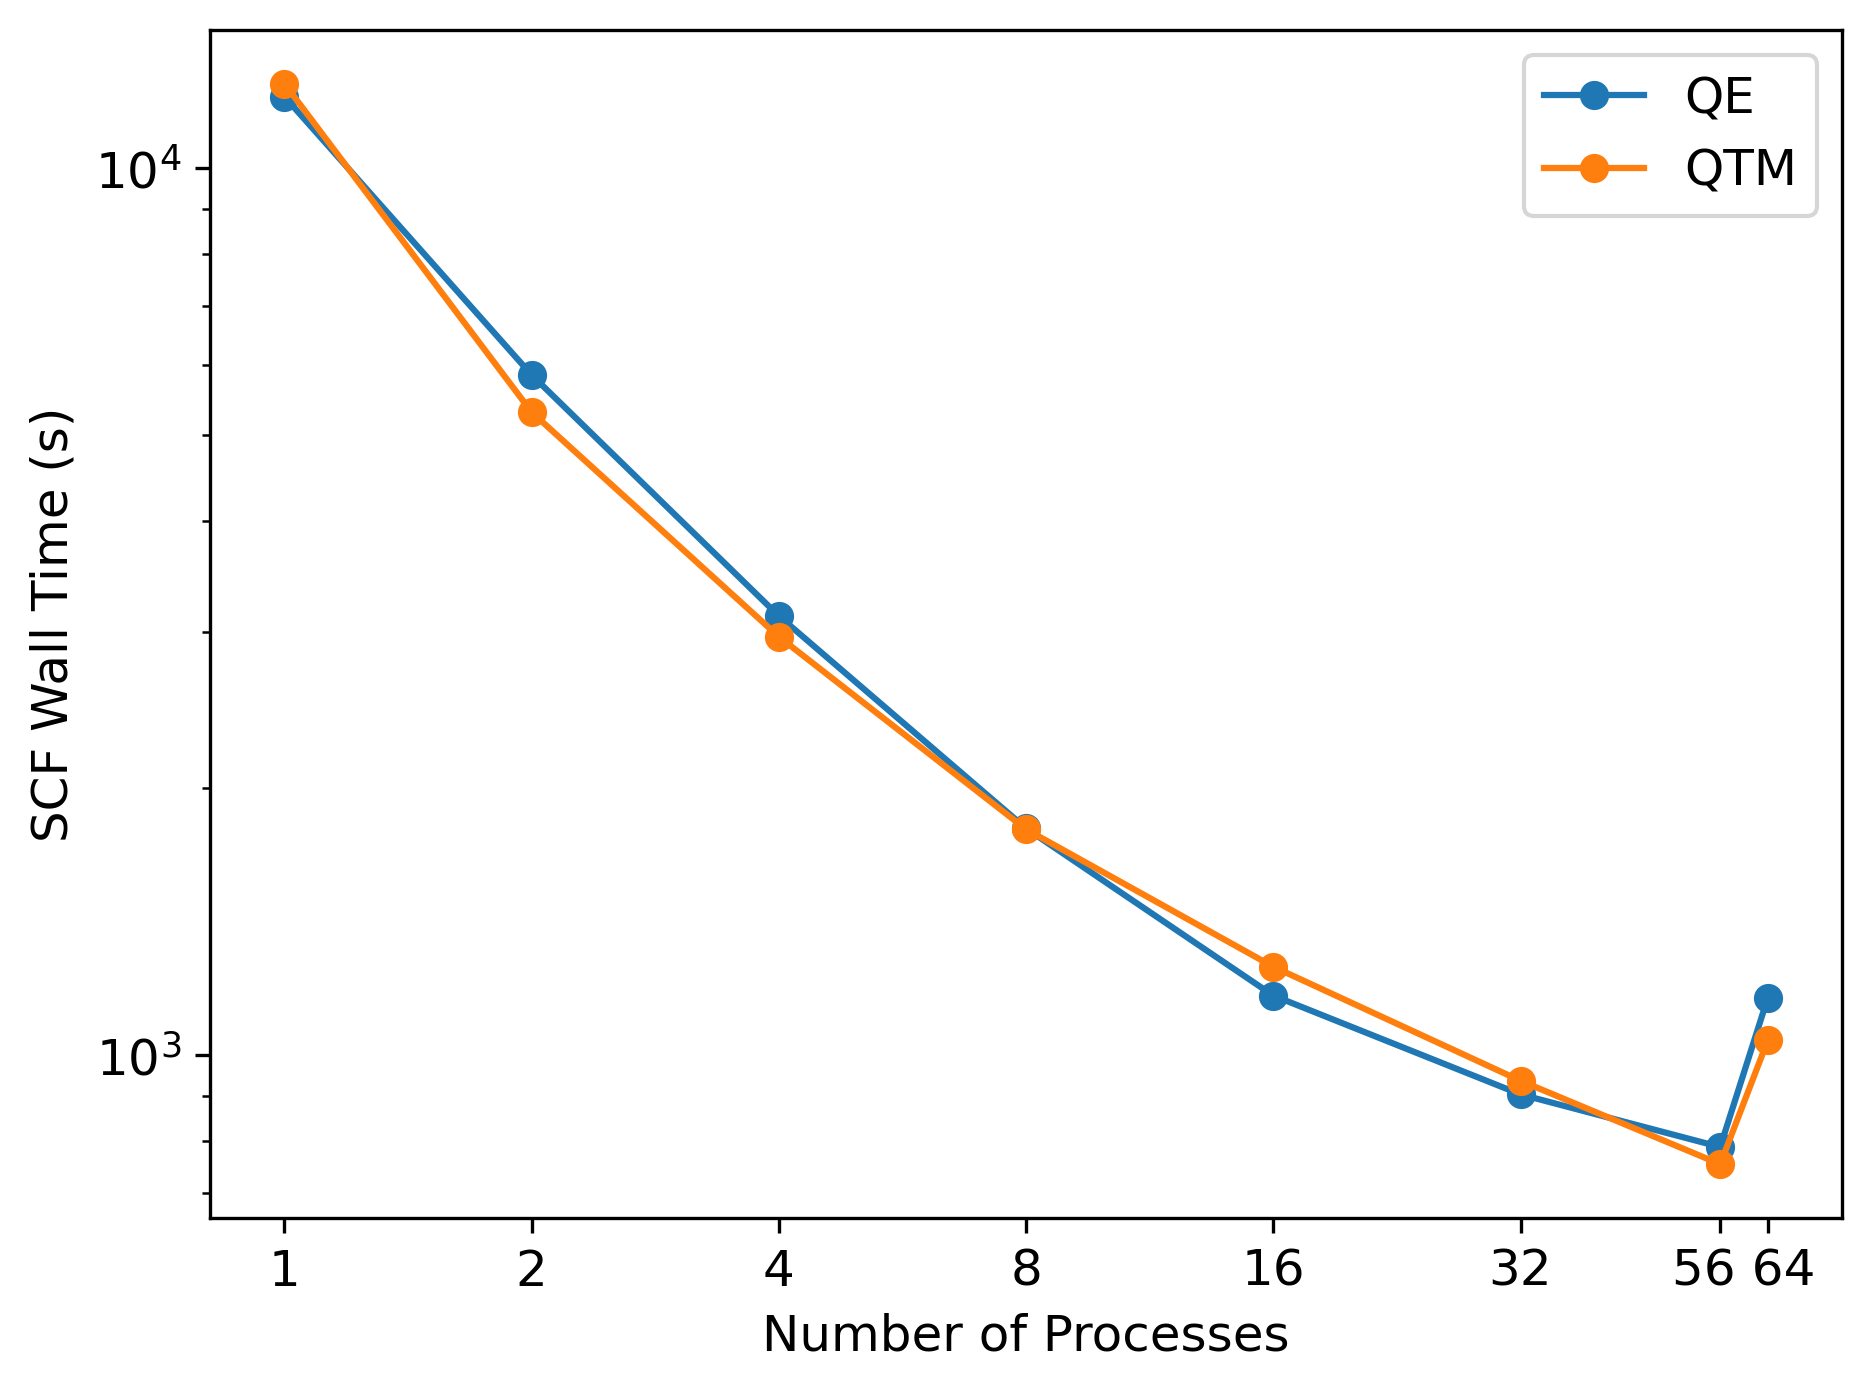

In [2]:
# Plot total_time_scf vs numprocs for both qe and qtm on the same plot
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["font.size"] = 12

# increase the resolution of the plot
plt.rcParams["figure.dpi"] = 300


# qtty = "total_time_scf"
qtty = "total_time_scf"

# select the rows where numprocs is in [1, 2, 4, 8, 16, 32, 56, 64]
df_qe = df_qe[df_qe["numprocs"].isin([1, 2, 4, 8, 16, 32, 56, 64])]
for i, df_qtm in enumerate(l_df_qtm):
    l_df_qtm[i] = df_qtm[df_qtm["numprocs"].isin([1, 2, 4, 8, 16, 32, 56, 64])]

plt.plot(df_qe["numprocs"], df_qe[qtty], label="QE", marker="o")
for i, df_qtm in enumerate(l_df_qtm):
    df_qtm.sort_values("numprocs", inplace=True)
    plt.plot(df_qtm["numprocs"], df_qtm[qtty], label="QTM", marker="o")
# plt.plot(df_qtm["numprocs"], df_qtm[qtty], label="QTM", marker="o")
# plt.plot(df_qe["numprocs"], list(df_qe[qtty])[0]/df_qe["numprocs"], label="Ideal scaling", linestyle="--")
plt.xlabel("Number of Processes")
plt.ylabel("SCF Wall Time (s)")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.tight_layout()
# plt.title("Band Parallelization of SCF")
# Add a gap between labels for x= 56 and 64
labels = df_qe["numprocs"].tolist()
labels[-1] = "  64"
labels[-2] = "56  "
plt.xticks(df_qe["numprocs"], labels=labels)
plt.tick_params(axis="x", which="minor", bottom=False)
# plt.savefig("gspace_6x6x6_13Sept2024.png")
plt.savefig("gspace_6x6x6.pdf")
plt.show()


In [3]:
# Merge the dataframes of qe and qtm
df_merged = df_qe.merge(l_df_qtm[0], on="numprocs", suffixes=("_qe", "_qtm"))
# Remove certain columns:
df_merged.drop(columns=["numcalls_scf_qtm", "numcalls_scf_qe"], inplace=True)
# Arrange the columns in a certain order
df_merged = df_merged[["numprocs", "total_time_scf_qe", "total_time_scf_qtm", "numcalls_hpsi_qe", "numcalls_hpsi_qtm"]]
# Change titles in the table
df_merged.columns = ["Number of Processes", "QE SCF Wall Time (s)", "QTM SCF Wall Time (s)", "QE h_psi Calls", "QTM h_psi Calls"]
df_merged["QE SCF Wall Time (s)"] = df_merged["QE SCF Wall Time (s)"].astype(int)
df_merged["QTM SCF Wall Time (s)"] = df_merged["QTM SCF Wall Time (s)"].astype(int)
display(df_merged)
df_merged.to_csv("gspace_si_6x6x6.csv", index=False)

,Number of Processes,QE SCF Wall Time (s),QTM SCF Wall Time (s),QE h_psi Calls,QTM h_psi Calls
0,1,12040,12449,110,107
1,2,5845,5307,102,97
2,4,3126,2962,98,98
3,8,1801,1797,103,101
4,16,1167,1258,96,101
5,32,903,935,93,98
6,56,787,753,98,95
7,64,1160,1039,102,92
